# Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

sns.set_context() 

In [2]:
df = pd.read_csv('AMZN.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6252,2022-03-18,3136.260010,3231.879883,3120.219971,3225.010010,3225.010010,5141300
6253,2022-03-21,3222.419922,3261.679932,3191.060059,3229.830078,3229.830078,3326900
6254,2022-03-22,3236.110107,3323.340088,3233.979980,3297.780029,3297.780029,3204300
6255,2022-03-23,3274.100098,3327.399902,3253.739990,3268.159912,3268.159912,2790600
6256,2022-03-24,3274.989990,3282.370117,3201.000000,3272.989990,3272.989990,2834900


In [5]:
df.shape

(6257, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6257 entries, 0 to 6256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6257 non-null   object 
 1   Open       6257 non-null   float64
 2   High       6257 non-null   float64
 3   Low        6257 non-null   float64
 4   Close      6257 non-null   float64
 5   Adj Close  6257 non-null   float64
 6   Volume     6257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 342.3+ KB


Let's look to see what the variables represent: 

* Open = Price from the first transaction of a trading day
* High = Maximum price in a trading day
* Low = Minimum price in a trading day
* Close = Price from the last transaction of a trading day
* Adj Close = Closing price adjusted to reflect the value after accounting for   any corporate actions
* Volume = Number of units traded in a day

`date` should be a datetime object. We convert it below.



In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6.257000e+03
mean,565.005651,571.345671,558.004657,564.817334,564.817334,7.270525e+06
std,918.112233,928.035683,906.961303,917.488221,917.488221,7.108549e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,39.009998,39.799999,38.360001,39.060001,39.060001,3.536500e+06
50%,105.930000,110.625000,101.500000,103.625000,103.625000,5.424200e+06
75%,596.140015,600.750000,588.299988,593.859985,593.859985,8.242900e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.043292e+08


In [12]:
df.nunique()

Date         6257
Open         5555
High         5505
Low          5510
Close        5644
Adj Close    5644
Volume       6069
dtype: int64

In [13]:
df = df.drop(columns=['Adj Close'])

In [14]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200


# Exploratory Data Analysis

## Univariate Analysis

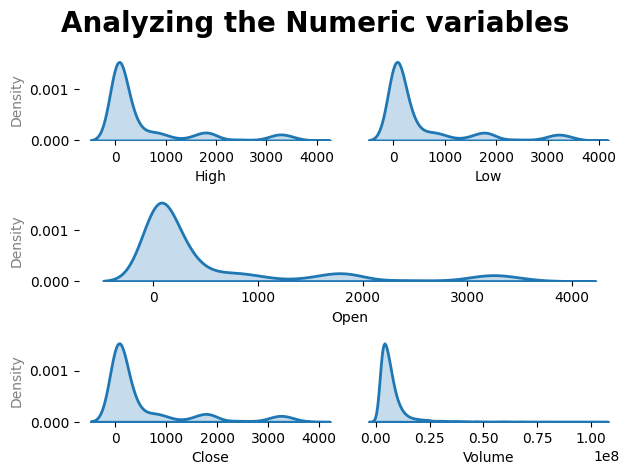

In [15]:
fig=plt.figure(tight_layout=True)
plt.suptitle("Analyzing the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.kdeplot(df['High'], ax=ax['A'], fill=True, linewidth=2)
sns.kdeplot(df['Low'], ax=ax['B'], fill=True, linewidth=2)
sns.kdeplot(df['Open'], ax=ax['C'], fill=True, linewidth=2)
sns.kdeplot(df['Close'], ax=ax['D'], fill=True, linewidth=2)
sns.kdeplot(df['Volume'], ax=ax['E'], fill=True, linewidth=2)
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

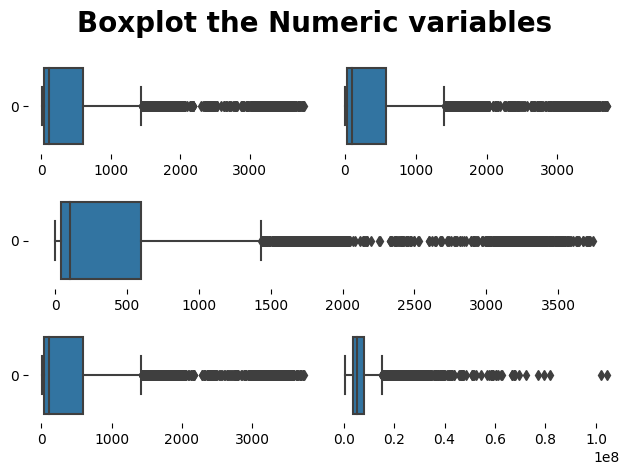

In [16]:
fig=plt.figure(tight_layout=True)
plt.suptitle("Boxplot the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.boxplot(df['High'], orient="h", ax=ax['A'])
sns.boxplot(df['Low'], orient="h", ax=ax['B'])
sns.boxplot(df['Open'], orient="h", ax=ax['C'])
sns.boxplot(df['Close'], orient="h", ax=ax['D'])
sns.boxplot(df['Volume'], orient="h", ax=ax['E'])
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

## Multivariate Analysis

### Pairs Plot

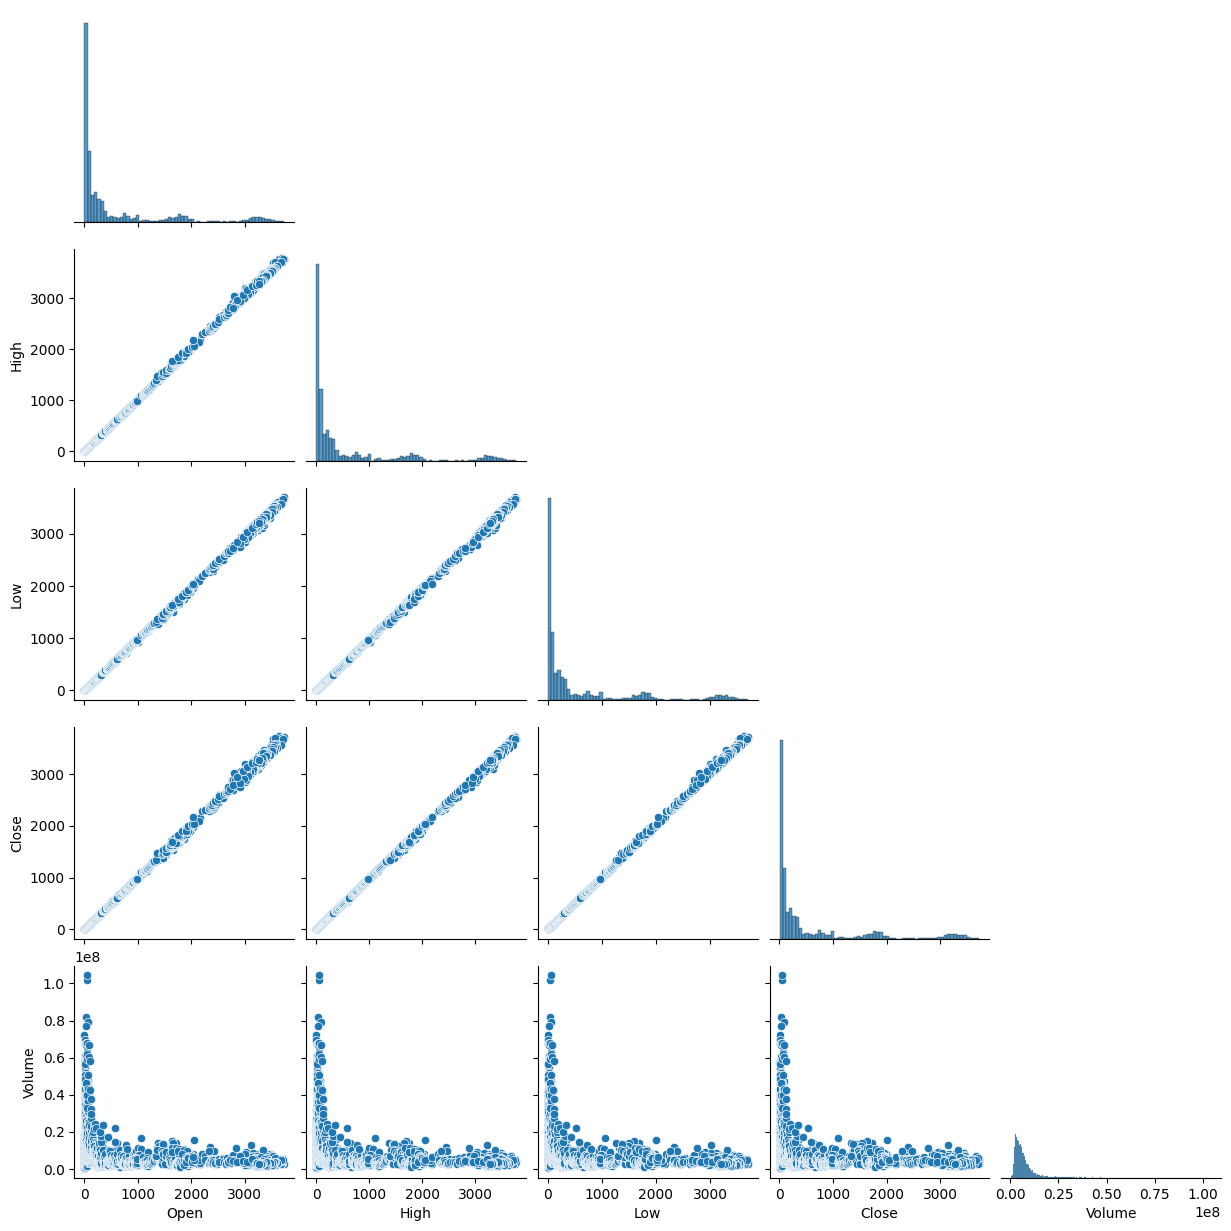

In [17]:
sns.pairplot(df, corner=True)

### Heat Map

<Axes: >

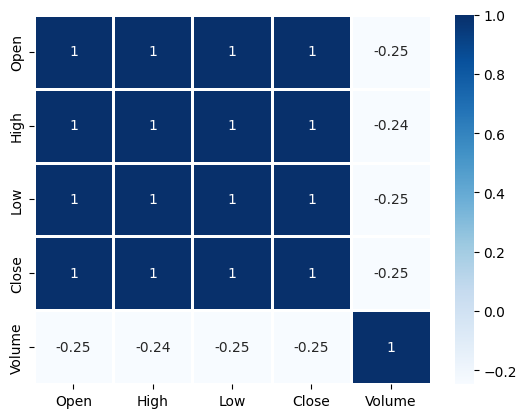

In [18]:
fig=plt.figure()
sns.heatmap(df.corr(), annot=True, cmap='Blues', linecolor='white', linewidth=2 )

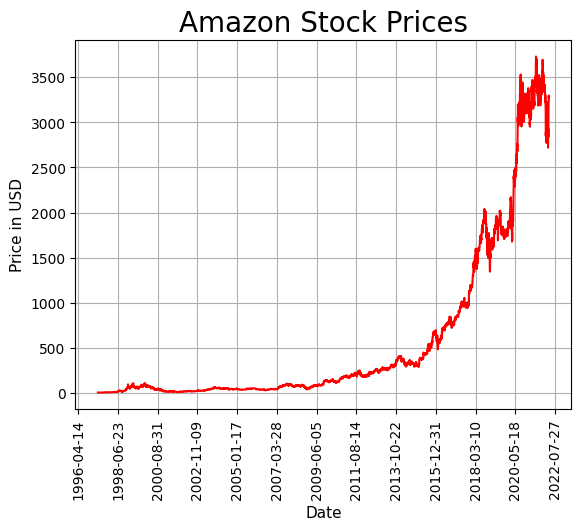

In [19]:
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
plt.xticks(rotation=90) 
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Amazon Stock Prices', fontsize='20')
plt.grid()
plt.show()

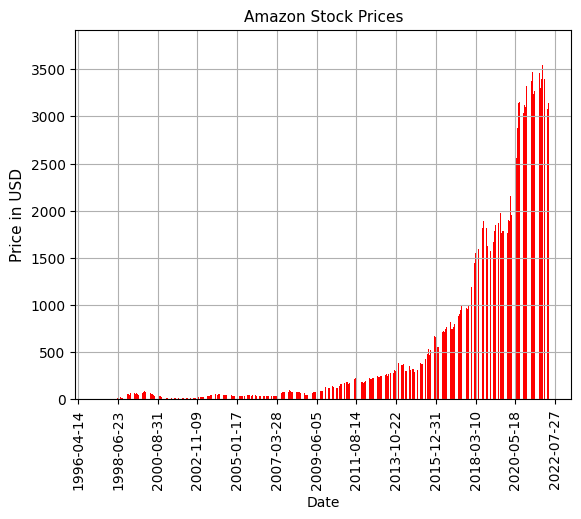

In [20]:
fig, ax = plt.subplots()
ax.bar(df['Date'], df['Close'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date')
plt.xticks(rotation=90) 
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Amazon Stock Prices', fontsize='11')
plt.grid()
plt.show()

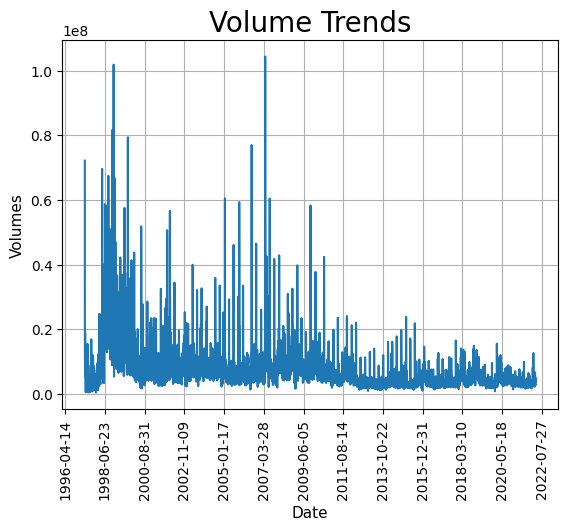

In [21]:
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
plt.xticks(rotation=90) 
ax.set_ylabel('Volumes', fontsize='11')
plt.title('Volume Trends', fontsize=20)
plt.grid()
plt.show()

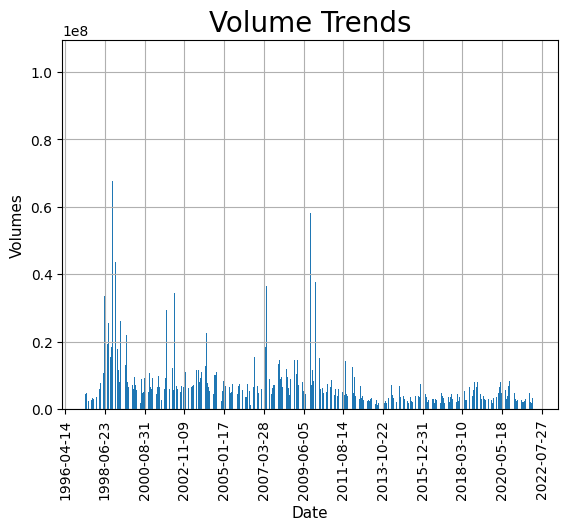

In [22]:
fig, ax = plt.subplots()
ax.bar(df['Date'], df['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
plt.xticks(rotation=90) 
ax.set_ylabel('Volumes', fontsize='11')
plt.title('Volume Trends', fontsize=20)
plt.grid()
plt.show()

In [23]:
df['Market Cap'] = df['Open'] * df['Volume']

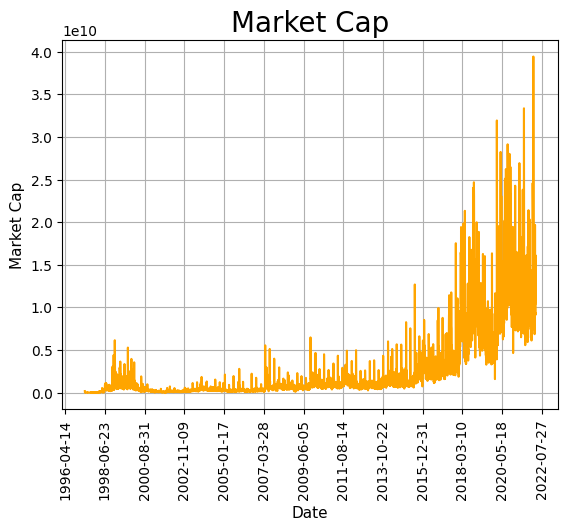

In [24]:
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
plt.xticks(rotation=90) 
ax.set_ylabel('Market Cap', fontsize='11')
plt.title('Market Cap', fontsize=20)
plt.grid()
plt.show()

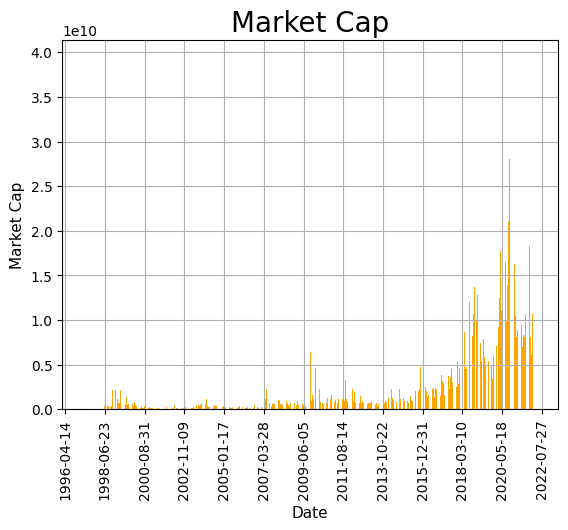

In [25]:
fig, ax = plt.subplots()
ax.bar(df['Date'], df['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
plt.xticks(rotation=90) 
ax.set_ylabel('Market Cap', fontsize='11')
plt.title('Market Cap', fontsize=20)
plt.grid()
plt.show()

In [26]:
df.iloc[df['Market Cap'].argmax()]

Date          2022-02-04 00:00:00
Open                  3112.129883
High                       3224.0
Low                   3012.159912
Close                 3152.790039
Volume                   12672800
Market Cap     39439399581.282402
Name: 6223, dtype: object

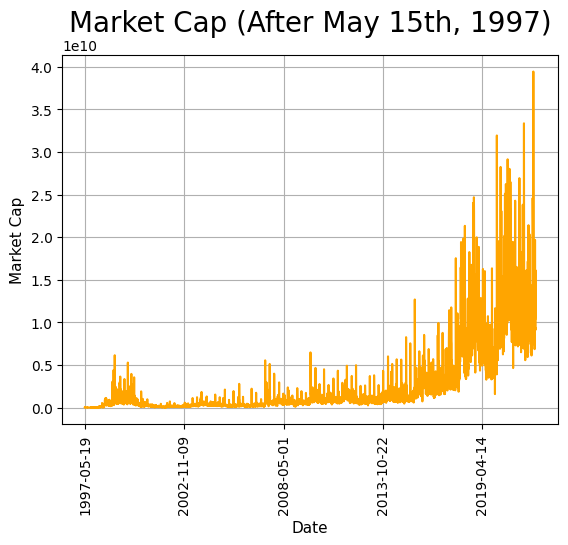

In [27]:
ohlc = df[df['Date'] > '1997-05-15']
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume',
                    'Market Cap']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format='%Y-%m-%d')
fig, ax = plt.subplots()
ax.plot(ohlc['Date'], ohlc['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='11')
plt.xticks(rotation=90) 
ax.set_ylabel('Market Cap', fontsize='11')
plt.grid()
plt.title('Market Cap (After May 15th, 1997)', fontsize='20')
plt.show()

In [28]:
df['vol'] = (df['Close'] / df['Close'].shift(1)) - 1

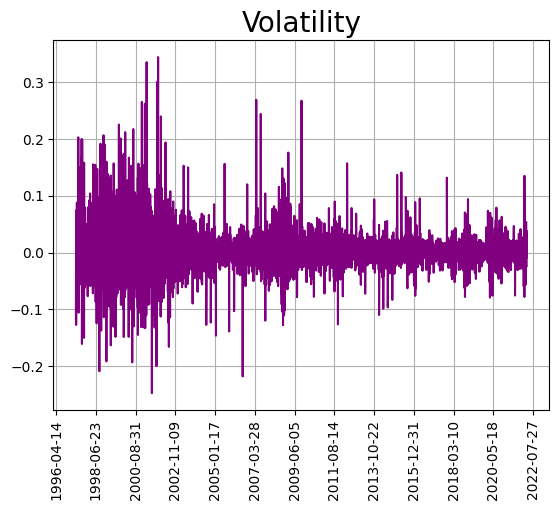

In [29]:
fig, ax = plt.subplots()
ax.plot(df['Date'], df['vol'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.xticks(rotation=90) 
plt.title('Volatility', fontsize=20)
plt.grid()
plt.show()

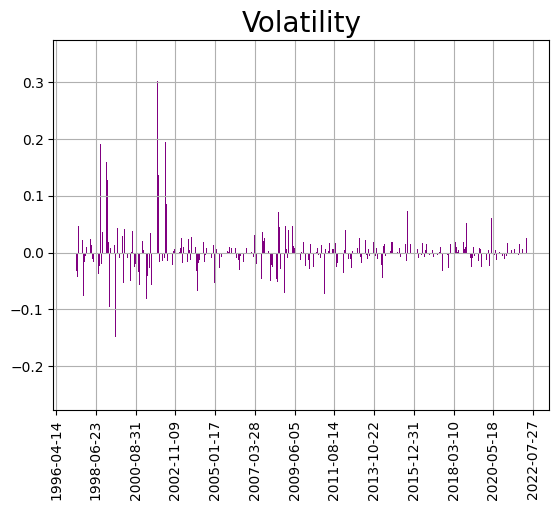

In [30]:
fig, ax = plt.subplots()
ax.bar(df['Date'], df['vol'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.xticks(rotation=90) 
plt.title('Volatility', fontsize=20)
plt.grid()
plt.show()

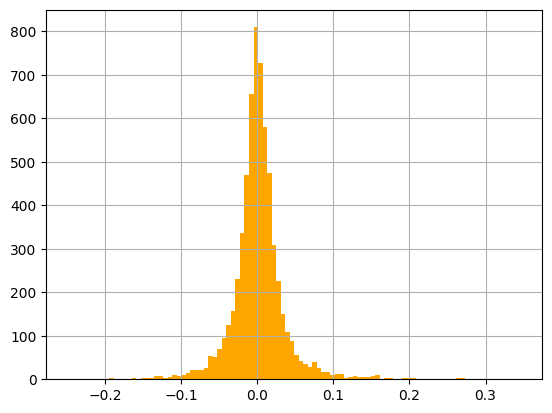

In [31]:
df['vol'].hist(bins=100, color='orange');

In [32]:
df['Cumulative Return'] = (1 + df['vol']).cumprod()

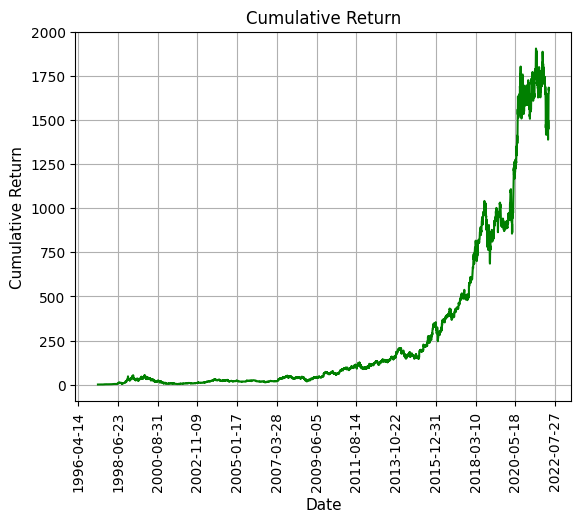

In [33]:
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
plt.xticks(rotation=90) 
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.title('Cumulative Return')
plt.grid()
plt.show()

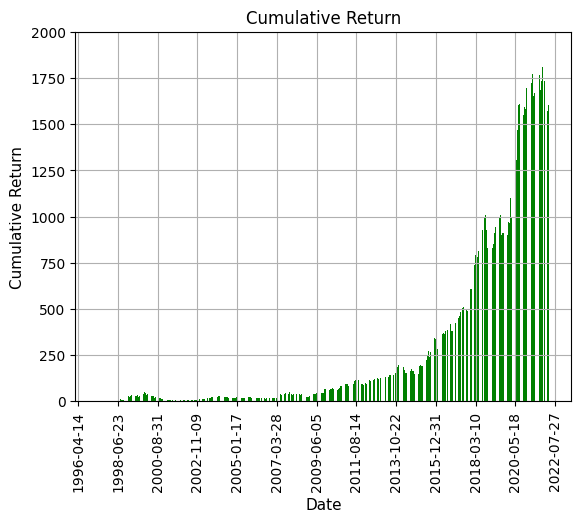

In [34]:
fig, ax = plt.subplots()
ax.bar(df['Date'], df['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
plt.xticks(rotation=90) 
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.title('Cumulative Return')
plt.grid()
plt.show()

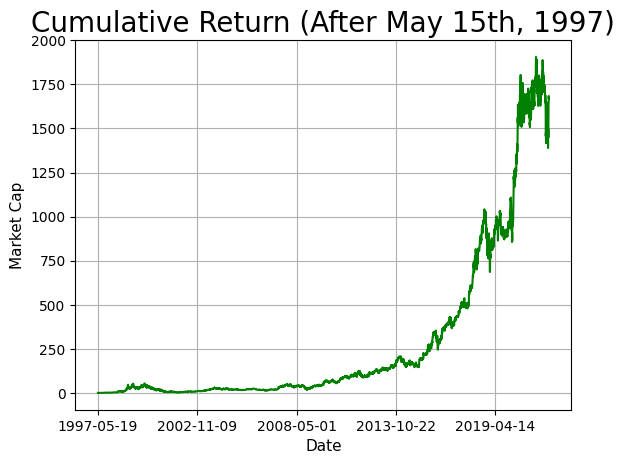

In [35]:
ohlc = df[df
          ['Date'] > '1997-05-15']
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume',
                    'Market Cap', 'Cumulative Return']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format='%Y-%m-%d')
fig, ax = plt.subplots()
ax.plot(ohlc['Date'], ohlc['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.grid()
plt.title('Cumulative Return (After May 15th, 1997)', fontsize='20')
plt.show()

## Seasonality

In [36]:
df = pd.read_csv("/content/AMZN.csv", parse_dates=True, index_col = "Date")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6257 entries, 1997-05-15 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6257 non-null   float64
 1   High       6257 non-null   float64
 2   Low        6257 non-null   float64
 3   Close      6257 non-null   float64
 4   Adj Close  6257 non-null   float64
 5   Volume     6257 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 342.2 KB


<BarContainer object of 27 artists>

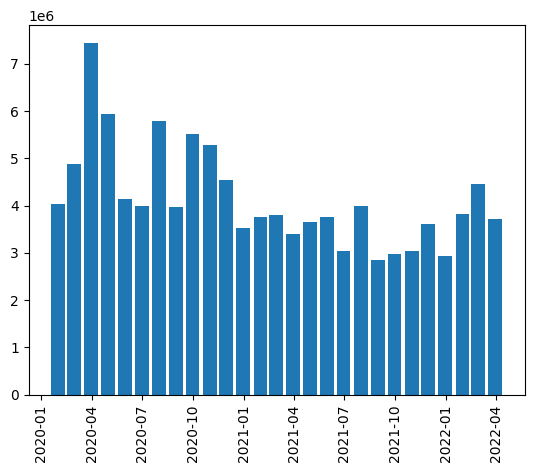

In [38]:
df_month = df.resample("M").mean()
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))
plt.xticks(rotation=90) 
ax.bar(df_month['2020':].index, df_month.loc['2020':, "Volume"], width=25, align='center')

## Resampling and Rolling

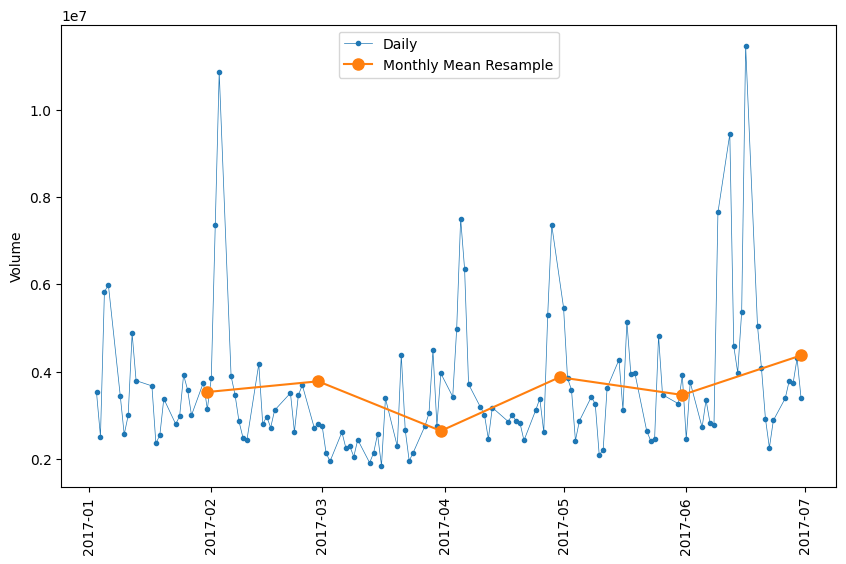

In [48]:
start, end = '2017-01', '2017-06'
fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'Volume'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_month.loc[start:end, 'Volume'],
marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Volume')
plt.xticks(rotation=90) 
ax.legend();

### Weekly Resampling

In [40]:
df_week = df.resample("W").mean()

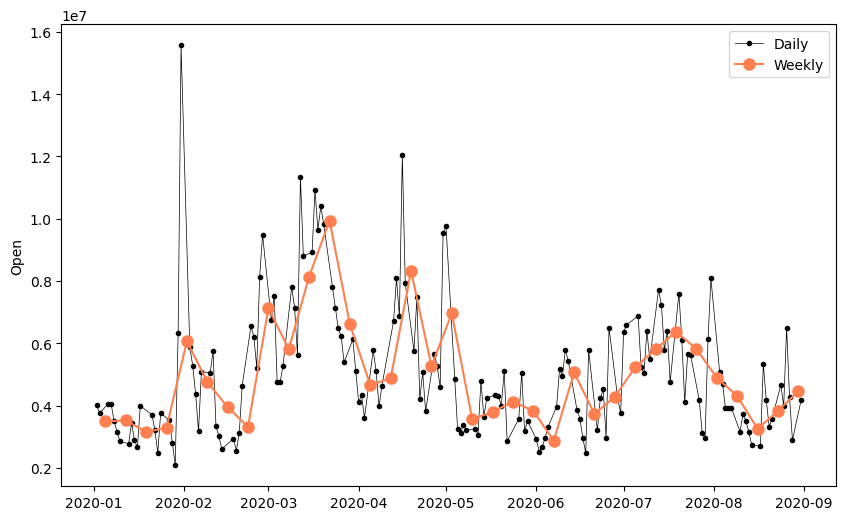

In [49]:
start, end = '2020-01', '2020-08'
fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'Volume'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
ax.plot(df_week.loc[start:end, 'Volume'], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')
ax.set_ylabel("Open")
ax.legend()

## Rolling

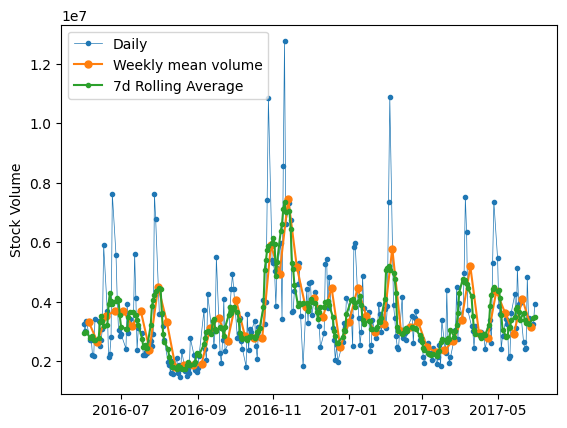

In [42]:
df_7d_rolling = df.rolling(7, center=True).mean()
start, end = '2016-06', '2017-05'
fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'Volume'], marker='.', linestyle='-', 
        linewidth=0.5, label='Daily')
ax.plot(df_week.loc[start:end, 'Volume'], marker='o', markersize=5, 
        linestyle='-', label = 'Weekly mean volume')
ax.plot(df_7d_rolling.loc[start:end, 'Volume'], marker='.', linestyle='-', label='7d Rolling Average')
ax.set_ylabel('Stock Volume')
ax.legend()

## Plotting Change

### Shift

<Axes: xlabel='Date'>

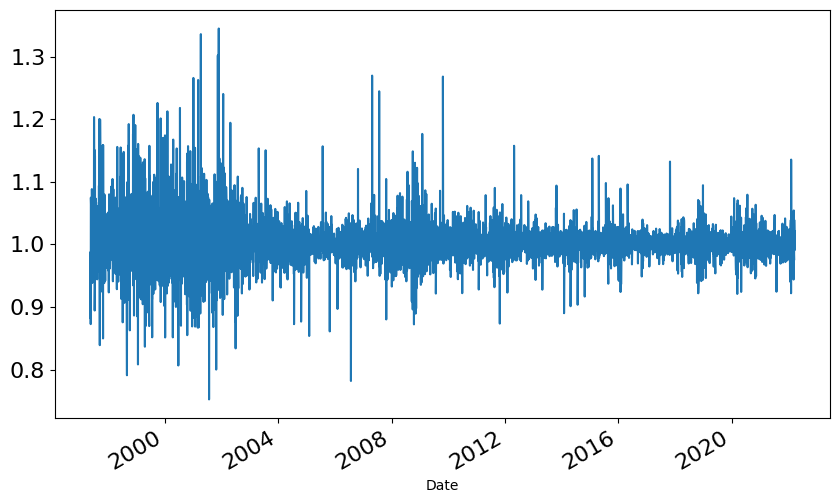

In [43]:
df['Change'] = df.Close.div(df.Close.shift())
df['Change'].plot(figsize = (10, 6), fontsize = 16)

<Axes: xlabel='Date'>

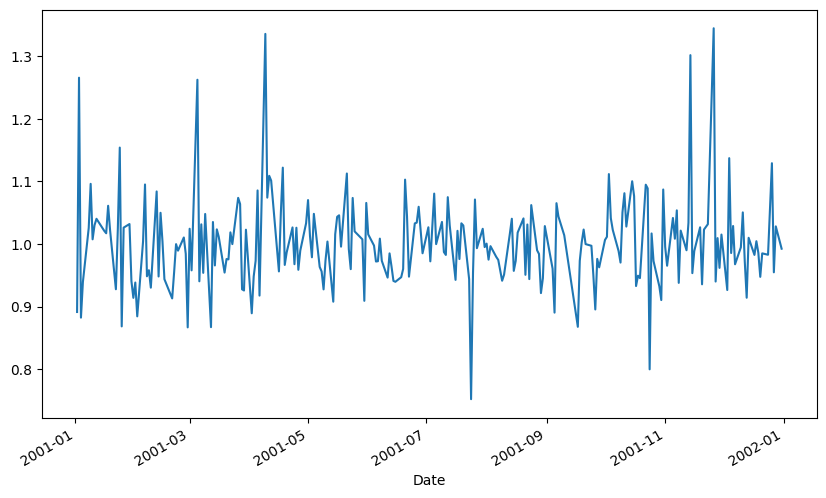

In [44]:
df['2001']['Change'].plot(figsize=(10, 6))

## Percent Change

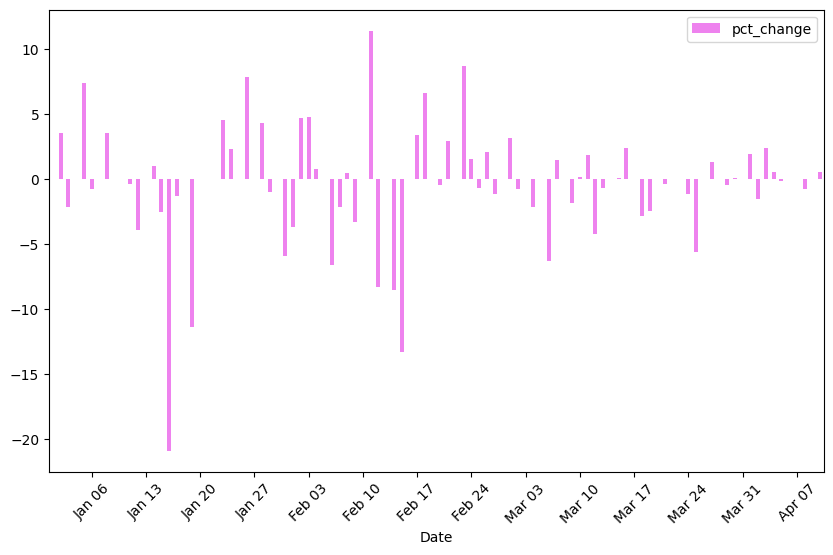

In [45]:
df_month.loc[:, 'pct_change'] = df.Close.pct_change()*100
fig, ax = plt.subplots(figsize=(10, 6))
df_month['pct_change' ].head(100).plot(kind='bar', color='violet', ax=ax)
ax.xaxis.set_major_locator(dates.WeekdayLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b %d'))
plt.xticks(rotation=45)
ax.legend()

## Differencing

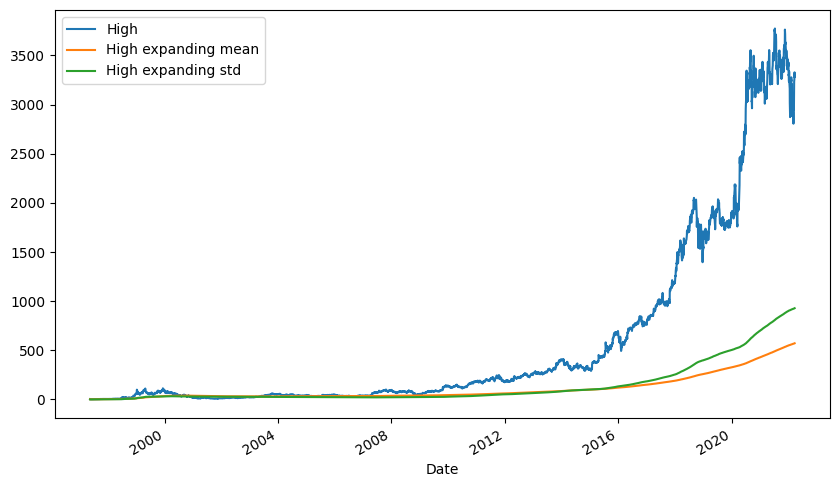

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = df.High.plot(label='High')
ax = df.High.expanding().mean().plot(label='High expanding mean')
ax = df.High.expanding().std().plot(label='High expanding std')
ax.legend()

## Decomposition

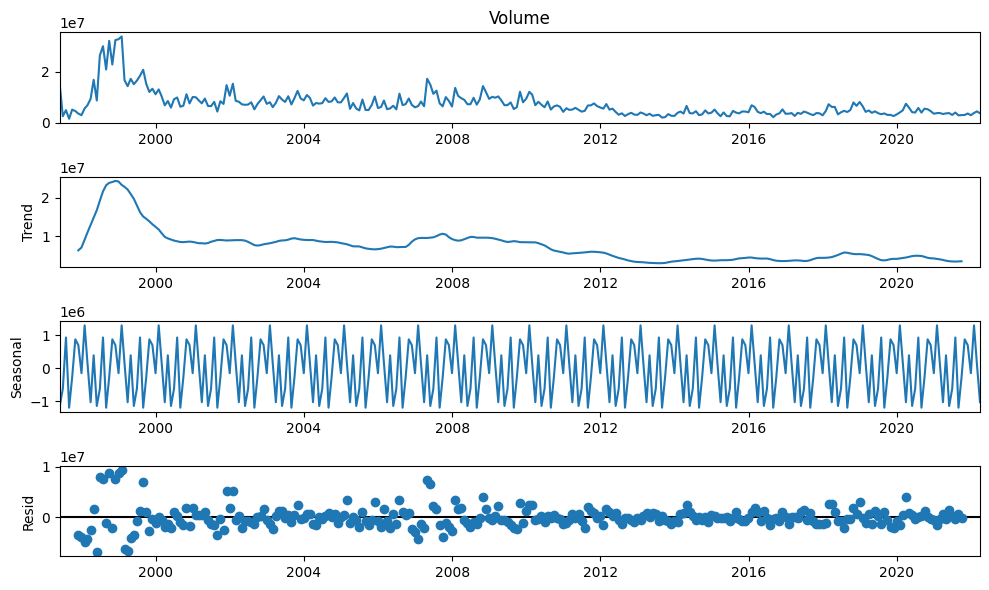

In [47]:
rcParams['figure.figsize'] = 10, 6
decomposition = sm.tsa.seasonal_decompose(df_month['Volume'], model='Additive')
fig = decomposition.plot()
plt.show()